## 怎麼用pandas計算常見的技術指標-----
* 移動平均
* 指數移動平均
* MACD

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [3]:
db = sqlite3.connect('twstock2')
tsmc = pd.read_sql(con = db, sql = 'SELECT * FROM "2330"')

In [4]:
tsmc.head()

,index,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,Date
0,421,台積電,"41,406,340","25,305","18,169,230,108",435.50,442.00,435.00,442.00,+,7.5,441.50,16,442.00,248,25.20,2020-08-26 00:00:00
1,421,台積電,"57,206,712","31,575","25,658,355,402",448.00,453.50,444.00,444.00,+,2.0,444.00,333,444.50,40,25.31,2020-08-27 00:00:00
2,421,台積電,"57,039,210","35,253","24,868,453,700",440.00,440.50,431.00,435.00,-,9.0,435.00,58,435.50,135,24.80,2020-08-28 00:00:00
3,421,台積電,"88,569,538","28,294","38,106,113,563",437.00,439.50,426.50,426.50,-,8.5,426.50,131,427.00,3,24.32,2020-08-31 00:00:00
4,421,台積電,"50,129,577","17,137","21,681,382,412",430.00,435.00,428.00,435.00,+,8.5,434.50,29,435.00,407,24.80,2020-09-01 00:00:00


In [5]:
# 清理資料
# 需要 成交股數、開盤價、最高價、最低價、收盤價的資料
# 用date 當作索引
tsmc.index = pd.to_datetime(tsmc['Date'])
tsmc = tsmc[["成交股數", "開盤價", "最高價", "最低價", "收盤價"]]

## 移動平均線
### MA(n) = (C1+ ... +Cn)/ n
### 利用 dataframe 下面的rolling方法 

In [6]:
type(tsmc['收盤價'][0])

str

In [7]:
tsmc['收盤價'] = pd.to_numeric(tsmc['收盤價'])

In [8]:
## 新增一個MA欄位給df 並回傳df
def moving_average(df, days):
    column_name = 'MA_' + str(days)
    df[column_name] = df['收盤價'].rolling(days).mean()
    return df

In [9]:
### 分別計算 7天 15天 的移動平均線 
tsmc = moving_average(tsmc, 7)
tsmc = moving_average(tsmc, 15)


In [10]:
tsmc.head()

,成交股數,開盤價,最高價,最低價,收盤價,MA_7,MA_15
Date,,,,,,,
2020-08-26,"41,406,340",435.50,442.00,435.00,442.0,NaN,NaN
2020-08-27,"57,206,712",448.00,453.50,444.00,444.0,NaN,NaN
2020-08-28,"57,039,210",440.00,440.50,431.00,435.0,NaN,NaN
2020-08-31,"88,569,538",437.00,439.50,426.50,426.5,NaN,NaN
2020-09-01,"50,129,577",430.00,435.00,428.00,435.0,NaN,NaN


## 指數移動平均線

In [11]:
## 新增一個MA欄位給df 並回傳df
def exponential_moving_average(df, days):
    column_name = 'EMA_' + str(days)
    df[column_name] = df['收盤價'].ewm(span = days).mean()
    return df

In [12]:
tsmc = exponential_moving_average(tsmc, 12)
tsmc = exponential_moving_average(tsmc, 26)
tsmc.tail()

,成交股數,開盤價,最高價,最低價,收盤價,MA_7,MA_15,EMA_12,EMA_26
Date,,,,,,,,,
2020-11-27,"35,196,829",487.50,492.00,486.50,489.0,490.214286,478.966667,482.912172,471.316695
2020-11-30,"149,311,778",493.00,493.50,480.50,480.5,488.857143,480.433333,482.541063,472.001199
2020-12-01,"38,341,265",489.50,490.00,483.50,490.0,489.142857,483.033333,483.688607,473.342171
2020-12-02,"60,208,035",499.50,500.00,493.50,499.0,489.500000,485.833333,486.044234,475.252946
2020-12-03,"36,919,644",499.50,499.50,495.00,497.0,490.214286,488.433333,487.729753,476.871837


## MACD
### DIF = EMA(12) - EMA(26)
### DEM = EMA(DIF, 9)
### OSC = DIF - DEM

In [13]:
tsmc["DIF"] = tsmc['EMA_12'] - tsmc['EMA_26']
tsmc["DEM"] = tsmc["DIF"].ewm(span = 9).mean()
tsmc['OSC'] = tsmc['DIF'] - tsmc['DEM']
tsmc.tail()

,成交股數,開盤價,最高價,最低價,收盤價,MA_7,MA_15,EMA_12,EMA_26,DIF,DEM,OSC
Date,,,,,,,,,,,,
2020-11-27,"35,196,829",487.50,492.00,486.50,489.0,490.214286,478.966667,482.912172,471.316695,11.595477,10.359693,1.235785
2020-11-30,"149,311,778",493.00,493.50,480.50,480.5,488.857143,480.433333,482.541063,472.001199,10.539863,10.395727,0.144136
2020-12-01,"38,341,265",489.50,490.00,483.50,490.0,489.142857,483.033333,483.688607,473.342171,10.346436,10.385869,-0.039433
2020-12-02,"60,208,035",499.50,500.00,493.50,499.0,489.500000,485.833333,486.044234,475.252946,10.791287,10.466952,0.324335
2020-12-03,"36,919,644",499.50,499.50,495.00,497.0,490.214286,488.433333,487.729753,476.871837,10.857916,10.545145,0.312771


In [14]:
tsmc = tsmc['2020-09-15':] ### 從有值的地方開始畫圖
tsmc.head()

,成交股數,開盤價,最高價,最低價,收盤價,MA_7,MA_15,EMA_12,EMA_26,DIF,DEM,OSC
Date,,,,,,,,,,,,
2020-09-15,"39,661,449",440.50,447.00,439.50,445.0,434.500000,434.800000,435.890212,435.070671,0.819541,-0.187627,1.007168
2020-09-16,"70,608,238",460.00,462.00,455.50,458.0,439.071429,435.866667,439.544028,437.469267,2.074761,0.277955,1.796806
2020-09-17,"44,420,506",453.00,455.00,446.50,448.5,441.571429,436.166667,441.007374,438.588983,2.418391,0.715904,1.702487
2020-09-18,"52,999,922",447.00,449.50,443.00,444.0,444.000000,436.766667,441.491725,439.123582,2.368143,1.052414,1.315729
2020-09-21,"40,193,920",443.50,450.00,440.00,440.0,444.714286,437.666667,441.252209,439.208081,2.044127,1.253657,0.790471


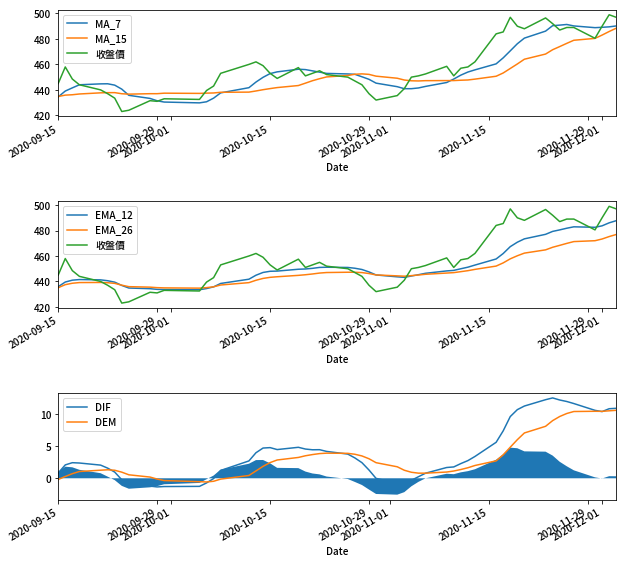

In [15]:
fig, ax = plt.subplots(3, 1, figsize = (10, 10))
plt.subplots_adjust(hspace = 0.8)
tsmc['MA_7'].plot(ax = ax[0])
tsmc['MA_15'].plot(ax = ax[0])
tsmc['收盤價'].plot(ax = ax[0])
ax[0].legend()
tsmc['EMA_12'].plot(ax = ax[1])
tsmc['EMA_26'].plot(ax = ax[1])
tsmc['收盤價'].plot(ax = ax[1])
ax[1].legend()
tsmc['DIF'].plot(ax = ax[2])
tsmc['DEM'].plot(ax = ax[2])
ax[2].fill_between(tsmc.index, 0, tsmc["OSC"])
ax[2].legend()
plt.show()


